# **Common Continuous Distribution**

### **1. Uniform Distribution**

* The probability density of each point in the range is the same.

* $\cal{R}_{\it{x}}=\lbrace x|a\leq x \leq b \rbrace$

* paramter
    * $a$: lowerbound, $a \in \Bbb{R}$
    * $b$: upperbound, $b \in \Bbb{R}$, and $-\infty < a < b < \infty$

* $X \sim \cal{U}(a,b) \implies f_X(x)=\frac{1}{b-a}$

* $E(X)=\int_a^b x\frac{1}{b-a}dx=\frac{1}{2(b-a)}x^2|_a^b=\frac{b^2-a^2}{2(b-a)}=\frac{a+b}{2}$

* $Var(X)=E(X^2)-[E(X)]^2=\frac{a^2+ab+b^2}{3}-(\frac{(a+b)}{2})^2=\frac{(b-a)^2}{12}$

    * $E(X^2)=\int_a^b x^2\frac{1}{b-a}dx=\frac{1}{3}{2(b-a)}x^3|_a^b=\frac{a^2+ab+b^2}{3}$

* $M(t)=E(e^{tx})=\int_a^b e^{tx}\frac{1}{b-a}dx=\frac{1}{(b-a)t}e^{tx}|_a^b=\frac{e^{tb}-e^{ta}}{(b-a)t}$

* Univerality of Uniform: $Y=F_X(x) \implies Y \sim \cal{U}(0,1)$

    *Proof: $F_Y(y)=P(Y\leq y)=P(F_X(x)\leq y)=P(x\leq F_X^{-1}(y))=F_X(F_X^{-1}(y))=y$  

    $\implies f_Y(y)=F_Y^{'}(y)=1,\ 0\leq y \leq 1$  
    
    $\implies Y\sim \cal{U}(0,1)$

In [1]:
import random
random.uniform(0, 1)

0.42759897581275386

Text(0.5, 1.0, 'Uniform Distribution')

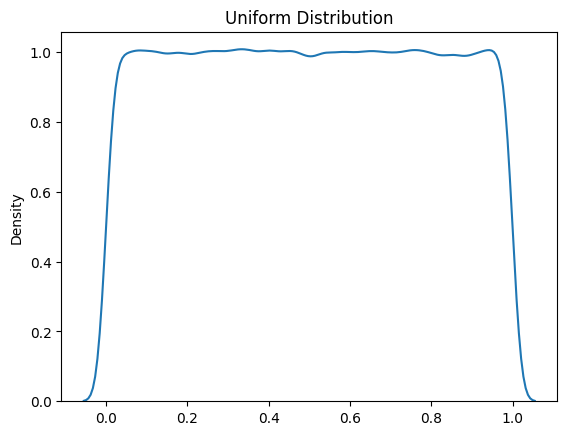

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


uni = np.random.uniform(0, 1, 1000000)
sns.kdeplot(uni)
plt.title("Uniform Distribution")

### **2. Normal distribtution**

* $\int_{\infty}^{\infty}e^{\frac{-1}{2}z^2}dz=\sqrt{2\pi}$

* Normal distribution is also named Gaussian distribtuion, which probibility density likes bell-shaped doistribution (central part with more density)

* $\cal{R}_{\it{x}}=\lbrace x| -\infty\leq x\leq\infty \rbrace$

* parameter
    * $\mu$: expected value, $-\infty<\mu<\infty$
    * $\sigma^2$: variance, $\sigma^2>0$


* $X\sim\cal{N}(\mu,\sigma^2)\implies f_X(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$

* $E(X)=\mu$

* $Var(X)=\sigma$

* $M(t)=E(e^{tx})=\int_{-\infty}^{\infty}e^{tx}\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx=\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-(\mu+\sigma x)^2t)^2-2\mu\sigma^2t-(\sigma^2t)^2}{2\sigma^2}}dx$  
    $=e^{\frac{(x-(\mu+\sigma x)^2t)^2}{2\sigma^2}}\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-1}{2}(\frac{x-(\mu+\sigma^2t)}{\sigma})^2}dx=e^{\frac{(x-(\mu+\sigma x)^2t)^2}{2\sigma^2}}=e^{\mu t+\frac{1}{2}\sigma^2t^2}$

* symmetric distribution: 
    * $\mu=\eta=m_o$
    * $\alpha_3=0$
    * $\alpha_4=3$

* Random variables after linear transformation, still normal distribution.

* If $X\sim\cal{N}(\mu=0,\sigma^2=1)$, we said that $X$ belongs to **standard** normal distribution.

* Linear comnination of normal distribution, still normal distribution.  
    $\perp \begin{cases} X \sim \cal{N}({\mu}_1,{\sigma}_1) \\ Y \sim \cal{N}({\mu}_2,{\sigma}_2) \end{cases} \implies U=X+Y \sim \cal{N}({\mu}_1+{\mu}_2, {\sigma}_1+{\sigma}_2)$

* Normal approximation
    * When $X\sim\cal{B}(n,p)$, if $n$ is large enough and $p \to \frac{1}{2}$, $\frac{X-np}{\sqrt{npq}}\to\cal{N}(np,npq)$

    * When $X\sim\text{Poi}(\lambda)$, if $\lambda$ is large enough, $\frac{X-\lambda}{\sqrt{\lambda}}\to\cal{N}(\lambda,\lambda)$

Text(0.5, 1.0, 'Normal Distribution')

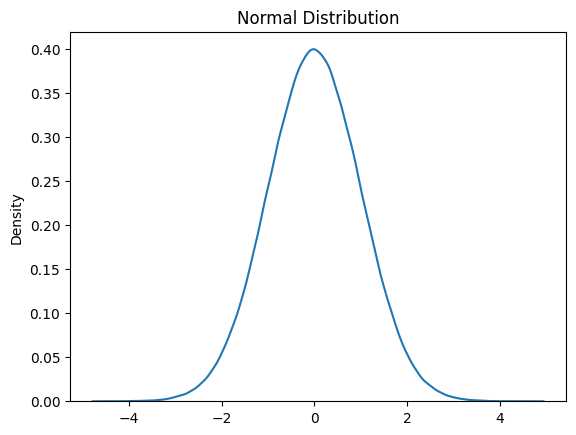

In [3]:
norm = np.random.standard_normal(1000000)
sns.kdeplot(norm)
plt.title("Normal Distribution")

Text(0.5, 1.0, 'Normal Distribution')

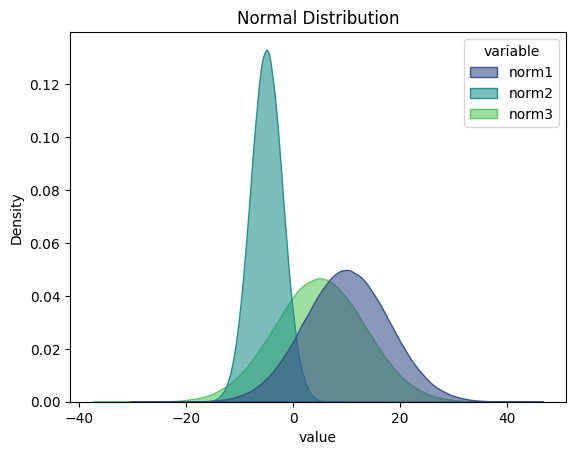

In [4]:
import pandas as pd
norm1 = np.random.normal(10,8,1000000)
norm2 = np.random.normal(-5,3,1000000)
norm3 = norm1 + norm2 #N(5, 11)
df = pd.DataFrame({'norm1': norm1, 'norm2': norm2, 'norm3': norm3})
df = pd.melt(df)

sns.kdeplot(data=df, x="value", hue="variable", fill=True, common_norm=False, alpha=0.6, palette="viridis")
plt.title("Normal Distribution")


### **3. Gamma distribution**

* Gamma function: $\Gamma(\alpha)=\int_0^{\infty}x^{\alpha-1}e^{-x}dx$

    * If $n$ is positive integer, $\Gamma(n)=(n-1)!$
        * With integration by part: $\int udv = uv - \int vdu$  
            $u=x^{\alpha-1},\ dv=e^{-x}dx$  

            $\frac{du}{dx}=(\alpha-1)x^{\alpha-2},\ \frac{dv}{dx}=e^{-x}$  

            $du=(\alpha-1)x^{\alpha-2}dx,\ v=-e^{-x}$ 

            $\implies \int_0^{\infty}x^{\alpha-1}e^{-x}dx=-x^{\alpha-1}e^{-x}-(\alpha-1)\int e^{-x}x^{\alpha-2}dx$ 

    * $\Gamma(\frac{1}{2})=\sqrt{\pi}$

    * $\Gamma(\alpha)=\Gamma(\alpha-1)(\alpha-1)$

    * If $n$ is positive integer, $\Gamma(\alpha+n)=\Gamma(\alpha)\alpha(\alpha+1)...(\alpha+n-1)$

* Can discribe overall intervals between multiple event happened.

* $\cal{R}_{\it{x}}=\lbrace x| x\geq 0 \rbrace$

* parameter
    * $\alpha$: shape, $\alpha>0$
    * $\beta$: scale, $\beta>0$

* $X\sim\text{Gamma}(\alpha,\beta)\implies f_X(x)=\frac{x^{\alpha-1}e^{-\frac{x}{\beta}}}{\beta^{\alpha}\Gamma(\alpha)}$

* $E(X)=\int_0^{\infty}x\frac{x^{\alpha-1}e^{-\frac{x}{\beta}}}{\beta^{\alpha}\Gamma(\alpha)}dx=\alpha\beta\int_0^{\infty}\frac{x^{(\alpha+1)-1}e^{-frac{x}{\beta}}}{\beta^{\alpha+1}\Gamma(\alpha+1)}dx=\alpha\beta$

* $Var(X)=E(X^2)-[E(X)]^2=\alpha(\alpha+1)\beta^2-(\alpha\beta)^2=\alpha\beta^2$

    * $E(X^2)=\int_0^{\infty}x^2\frac{x^{\alpha-1}e^{-\frac{x}{\beta}}}{\beta^{\alpha}\Gamma(\alpha)}dx=\alpha(\alpha+1)\beta^2\int_0^{\infty}\frac{x^{(\alpha+2)-1}e^{-\frac{x}{\beta}}}{\beta^{\alpha+2}\Gamma(\alpha+2)}dx=\alpha(\alpha+1)\beta^2$

* $M(t)=E(e^{tx})=\int_0^{\infty}e^{tx}\frac{x^{\alpha-1}e^{-\frac{x}{\beta}}}{\beta^{\alpha}\Gamma(\alpha)}dx=\frac{1}{\beta^{\alpha}\Gamma(\alpha)}\int_0^{\infty}x^{\alpha-1}e^{-\frac{x}{\beta}+tx}dx=\frac{1}{\beta^{\alpha}\Gamma(\alpha)}\int_0^{\infty}x^{\alpha-1}e^{\frac{-x}{\frac{\beta}{1-\beta t}}}dx=\frac{1}{\beta^{\alpha}\Gamma(\alpha)}(\frac{\beta}{1-\beta t})^{\alpha}\Gamma(\alpha)=(1-\beta t)^{-\alpha}$

* asymmetric distribution
    * $\alpha_3=\frac{2}{\sqrt{\alpha}}>0 \implies$ skew to the right
    * $\alpha_4=3+\frac{6}{\alpha}>3$

* Given $X\sim\text{Gamma}(\alpha,\beta)$, if $Y=aX$ and $a>0$ then $Y\sim\text{Gamma}(\alpha,a\beta)$

* additivity

    $\perp \begin{cases} X \sim \text{Gamma}(\alpha_1,\beta) \\ Y \sim \text{Gamma}(\alpha_2,\beta) \end{cases} \implies U=X+Y \sim \text{Gamma}(\alpha_1+\alpha_2,\beta)$

Text(0.5, 1.0, 'Gamma  Distribution')

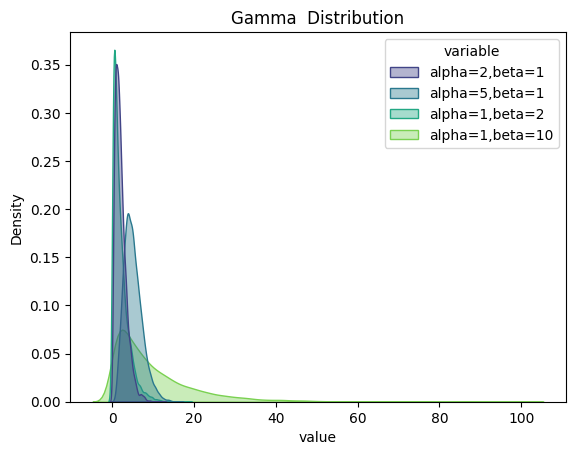

In [5]:
df = pd.DataFrame()

df['alpha=2,beta=1'] = np.random.gamma(2, 1, 10000)
df['alpha=5,beta=1'] = np.random.gamma(5, 1, 10000)
df['alpha=1,beta=2'] = np.random.gamma(1, 2, 10000)
df['alpha=1,beta=10'] = np.random.gamma(1, 10, 10000)

df =pd.melt(df)
sns.kdeplot(data=df, x="value", hue="variable", fill=True, common_norm=False, alpha=0.4, palette="viridis")
plt.title("Gamma  Distribution")

### **4. Exponential distribution**

* The interval between 2 consecutive event.

* $\cal{R}_{\it{x}}=\lbrace x| x\geq 0 \rbrace$

* parameter $\beta$: expected value, $\beta>0$

* $X\sim\text{Exp}(\beta) \implies f_X(x)\frac{1}{\beta}e^{\frac{-x}{\beta}}$

* $E(X)=\int_0^{\infty}x\frac{1}{\beta}e^{\frac{-x}{\beta}}dx=\frac{1}{\beta}\int_0^{\infty}x^{2-1}e^{\frac{-x}{\beta}}dx=\frac{1}{\beta}\beta^2\Gamma(2)=\beta$

* $Var(X)=E(X^2)-[E(X)]^2=2\beta^2-\beta^2=\beta^2$

    * $E(X^2)=\int_0^{\infty}x^2\frac{1}{\beta}e^{\frac{-x}{\beta}}dx=\frac{1}{\beta}\beta^3\Gamma(3)=2\beta^2$

* $M(t)=E(e^{tx})=\int_0^{\infty}e^{tx}\frac{1}{\beta}e^{\frac{-x}{\beta}}dx=\int_0^{\infty}\frac{1}{\beta}e^{(t-\frac{1}{\beta})x}dx=\frac{1}{\beta(t-\frac{1}{\beta})}=\frac{1}{1-\beta t}$

* $\text{Exp}(\beta)\sim\text{Gamma}(\alpha=1,\beta)$

* asymmetric distribution
    * $\alpha_3=2>0\implies$ skew to the right
    * $\alpha_4=9>3$

* Given $X\sim\text{Exp}(\beta)$, if $Y=aX$ and $a>0$ then $Y\sim\text{Exp}(a\beta)$

* Memoryless
    * Given $X\sim\text{Exp}(\beta)$, then $P(X>a+b|X>a)=P(X>b)$

* Exponential/Gamma distribution is dual distribution of Poisson distribution
    * If $Y\sim\text{Poi}(t\lambda)$ and $T\sim\text{Exp}(\beta=\frac{1}{\lambda})$, then $P(Y=0)=P(T>t)$
    * If $Y\sim\text{Poi}(t\lambda)$ and $T\sim\text{Gamma}(\alpha,\beta=\frac{1}{\lambda})$, then $P(Y=\alpha)=P(T>t)$

Text(0.5, 1.0, 'Exponential Distribution')

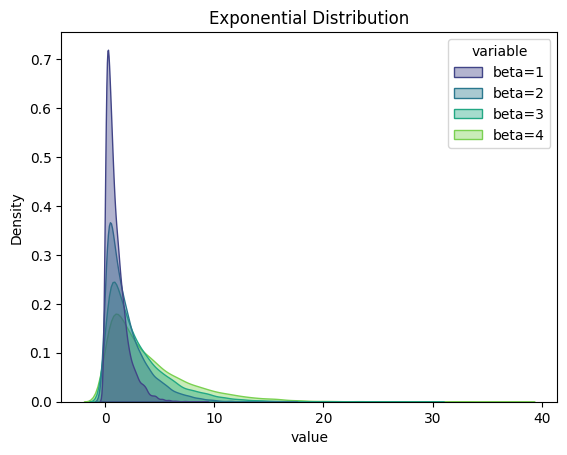

In [6]:
df = pd.DataFrame()
df['beta=1'] = np.random.exponential(1, 10000)
df['beta=2'] = np.random.exponential(2, 10000)
df['beta=3'] = np.random.exponential(3, 10000)
df['beta=4'] = np.random.exponential(4, 10000)
df =pd.melt(df)
sns.kdeplot(data=df, x="value", hue="variable", fill=True, common_norm=False, alpha=0.4, palette="viridis")
plt.title("Exponential Distribution")

### **5. Bivariate normal distribution**

* $\cal{R}_{\it{XY}}=\lbrace (x,y)| -\infty<x<\infty,\ -\infty<y<\infty \rbrace$

* parameter
    * $\mu_X$: expected value of $X$
    * $\mu_Y$: expected value of $Y$
    * $\sigma_X^2$; variance of $X$
    * $\sigma_X^2$; variance of $Y$
    * $\rho$: correlation coefficient of $X$ and $Y$

* $(X,Y)\sim\cal{BN}(\mu_X,\mu_Y,\sigma_X^2,\sigma_Y^2,\rho)$ $\implies f_{XY}(x,y)=\frac{1}{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}}e^{\frac{-1}{2(1-\rho^2)}[(\frac{x-\mu_X}{\sigma_X})^2-2\rho(\frac{x-\mu_X}{\sigma_X})(\frac{y-\mu_Y}{\sigma_Y})+(\frac{y-\mu_Y}{\sigma_Y})^2]}$

* $E(X)=\mu_X$

* $E(X)=\mu_Y$

* $Var(X)=\sigma_X$

* $Var(Y)=\sigma_Y$

* $Corr(X,Y)=\rho$

* $Cov(X,Y)=\sigma_{XY}=\rho\sigma_X\sigma_Y$

* Conditional distribution

    * $(X|Y=y)\sim\cal{N}\it(\mu_X+\rho\frac{\sigma_X}{\sigma_Y}(Y-\mu_Y),\sigma_X^2(1-\rho^2))$

    * $E(X|Y=y)=\mu_X+\rho\frac{\sigma_X}{\sigma_Y}(Y-\mu_Y)$

    * $Var(X|Y=y)=\sigma_X^2(1-\rho^2)$

* If $X\perp Y$, then $\rho=0$
